In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [27]:
spotify = pd.read_csv('spotifydf.csv')
spotify = spotify[['acousticness','danceability','duration_ms','energy','explicit','instrumentalness','key','liveness','loudness','mode','popularity','speechiness','tempo','valence','year']]
spotify.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928


In [28]:
spotify.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [30]:
y = spotify['popularity']
X = spotify.drop('popularity',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
variables = X.columns
model = sm.OLS(y_train,X_train[variables]).fit()
stat_sig_vars = variables
while any(model.pvalues > .05):
    stat_sig_vars = stat_sig_vars[model.pvalues <= .05]
    model = sm.OLS(y_train,X_train[stat_sig_vars]).fit()

model = sm.OLS(y_test,X_test[stat_sig_vars]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.837
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                          2.016e+04
Date:                Sun, 08 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:43:02   Log-Likelihood:                     -2.1184e+05
No. Observations:               50973   AIC:                                  4.237e+05
Df Residuals:                   50960   BIC:                                  4.238e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness       -24.4365      0.297    -82.415      0.000     -25.018     -23.855
danceability        19.3401      0.540     35.812      0.000      18.282      20.399
energy               3.9996      0.569      7.030      0.000       2.884       5.115
explicit             8.0928      0.286     28.312      0.000       7.533       8.653
instrumentalness    -6.9676      0.256    -27.195      0.000      -7.470      -6.465
key                 -0.0465      0.020     -2.376      0.018      -0.085      -0.008
liveness            -8.1831      0.407    -20.106      0.000      -8.981      -7.385
loudness             0.4810      0.022     22.331      0.000       0.439       0.523
mode                -0.9015      0.153     -5.893      0.000      -1.201      -0.602
speechiness        -30.5410      0.543    -56.244      0.000     -31.605     -29.477
tempo                0.0099      0.002      4.228      0.000       0.005       0.015
valence            -19.2260      0.353    -54.523      0.000     -19.917     -18.535
year                 0.0262      0.000     73.841      0.000       0.025       0.027
==============================================================================
Omnibus:                     2020.526   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2267.937
Skew:                           0.508   Prob(JB):                         0.00
Kurtosis:                       3.194   Cond. No.                     1.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
lm = LinearRegression()
model = lm.fit(X,y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
Yhat = lm.predict(X)
Yhat[:5]

array([-3.86224664, -6.16955446, -7.37824829, -4.21964554, -6.92891515])

In [41]:
# how well does the model fit? 
lm.score(X,y) # R^2 score

0.7838695470905557

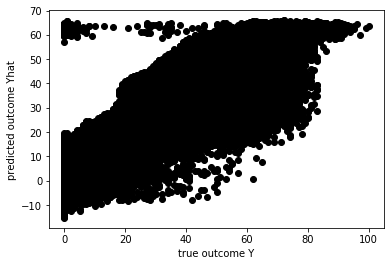

In [44]:
def plot_fit(Y, Yhat):
    plt.scatter(Y, Yhat,  color='black')
    plt.xlabel("true outcome Y")
    plt.ylabel("predicted outcome Yhat")

    plt.show()
    
plot_fit(y, Yhat)